In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import cross_val_score


In [17]:

# Load the dataset (replace with your actual data path)
# load in datasets
df_2020 = pd.read_csv('2020.csv')
df_2021 = pd.read_csv('2021.csv')
df_2022 = pd.read_csv('2022.csv')
df_2023 = pd.read_csv('2023.csv')
df_2024 = pd.read_csv('2024.csv')
data = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], axis=0)
# data

# Check for missing values
print(data.isnull().sum())

YEAR                 0
QUARTER              0
MONTH                0
AIRLINE_ID           0
UNIQUE_CARRIER       0
CARRIER              0
CARRIER_NAME         0
CARRIER_GROUP_NEW    0
SALA_GALLONS         5
SDOMT_GALLONS        2
SATL_GALLONS         2
SPAC_GALLONS         2
SLAT_GALLONS         2
SINT_GALLONS         2
TS_GALLONS           2
NALA_GALLONS         8
NDOM_GALLONS         2
NDOMT_GALLONS        2
NATL_GALLONS         2
NPAC_GALLONS         2
NLAT_GALLONS         3
MAC_GALLONS          7
NINT_GALLONS         2
TN_GALLONS           3
TDOMT_GALLONS        2
TINT_GALLONS         2
TOTAL_GALLONS        3
SALA_COST            4
SDOM_COST            2
SDOMT_COST           2
SATL_COST            2
SPAC_COST            2
SLAT_COST            2
SINT_COST            2
TS_COST              2
NALA_COST            8
NDOM_COST            2
NDOMT_COST           2
NATL_COST            2
NPAC_COST            2
NLAT_COST            2
MAC_COST             3
NINT_COST            2
TN_COST    

In [18]:
# Drop rows with missing target values (TOTAL_GALLONS, TOTAL_COST)
data = data.dropna(subset=['TOTAL_GALLONS', 'TOTAL_COST'])

# Label encode categorical columns like 'UNIQUE_CARRIER' and 'CARRIER'
label_encoder = LabelEncoder()
data['UNIQUE_CARRIER'] = label_encoder.fit_transform(data['UNIQUE_CARRIER'])
data['CARRIER'] = label_encoder.fit_transform(data['CARRIER'])

# One-hot encode other categorical columns (e.g., 'CARRIER_NAME', 'YEAR', 'QUARTER', 'MONTH')
# data_encoded = pd.get_dummies(data, columns=['CARRIER_NAME', 'YEAR', 'QUARTER', 'MONTH'], drop_first=True)

# Features and target variables
features = data.drop(columns=['TOTAL_GALLONS', 'TOTAL_COST'])
target_gallons = data['TOTAL_GALLONS']
target_cost = data['TOTAL_COST']



In [19]:
# Split the data into training and testing sets
# X_train, X_test, y_train_gallons, y_test_gallons = train_test_split(features, target_gallons, test_size=0.3, random_state=42)
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(features, target_cost, test_size=0.3, random_state=42)



In [20]:
# Initialize XGBoost models
# model_gallons = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, learning_rate=0.05,max_depth=3,subsample=.8,colsample_bylevel=1.0)
# model_cost = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, learning_rate=0.05,max_depth=3,subsample=.8,colsample_bylevel=1.0)
# cv_scores = cross_val_score(model_gallons, features, target_gallons, cv=5, scoring='r2')
# cv_scores

In [21]:
from skopt import BayesSearchCV
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBRegressor, plot_importance
from sklearn.pipeline import Pipeline
from skopt.space import Real, Integer
import xgboost as xgb

estimators = [
    ('encoder',TargetEncoder()),
    ('regressor',XGBRegressor(objective='reg:squarederror',random_state=42))
]

pipe = Pipeline(steps=estimators)

In [22]:
search_space = {
    'regressor__max_depth': Integer(2,100),
    'regressor__learning_rate': Real(0.5,1),
    'regressor__subsample': Real(0.5,1),
    'regressor__cosample_bytree': Real(0.5,1),
    'regressor__cosample_bylevel': Real(0.5,1),
    'regressor__cosample_bynode': Real(0.5,1),
    'regressor__reg_alpha': Real(0.5,10.0),
    'regressor__reg_lambda':Real(0.0,10.0),
    'regressor__gamma':Real(0.0,10.0),
    'regressor__max_bin':Integer(2,100)
    }
opt = BayesSearchCV(
    pipe,
    search_space,
    cv = 2,
    n_iter = 100,
    scoring = 'neg_mean_squared_error',
    random_state = 42
)


In [23]:
# fitting model for gallons of consumption
# opt.fit(X_train,y_train_gallons)

In [24]:
# fitting the model for cost data
opt.fit(X_train_cost,y_train_cost)

/Users/nathanielyee/miniconda3/envs/db/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:14:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "cosample_bylevel", "cosample_bynode", "cosample_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nathanielyee/miniconda3/envs/db/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:14:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "cosample_bylevel", "cosample_bynode", "cosample_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nathanielyee/miniconda3/envs/db/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:14:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "cosample_bylevel", "cosample_bynode", "cosample_bytree" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nathanielyee/miniconda3/envs/db/lib/python3.12/site

BayesSearchCV(cv=2,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('regressor',
                                         XGBRegressor(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_pol...
                             'regressor__max_bin': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'regressor__max_depth': Integer(low=2, high=100, prior='uniform', transform='normalize'),
                             'regressor__reg_alpha': Real(low=0.5, high=10.0, prior='uniform', transform='normalize'),
                             'regressor__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'regressor__subsample': Real(low=0.5, high=1, prior='uniform', transform='normalize')})

In [25]:
# Make predictions
# y_pred_gallons = opt.predict(X_test)

In [35]:
y_pred_cost = opt.predict(X_test_cost)

In [36]:
# Calculate metrics for the 'TOTAL_GALLONS' model
# mae_gallons = mean_absolute_error(y_test_gallons, y_pred_gallons)
# mse_gallons = mean_squared_error(y_test_gallons, y_pred_gallons)
# r2_gallons = r2_score(y_test_gallons, y_pred_gallons)

# Calculate metrics for the 'TOTAL_COST' model
mae_cost = mean_absolute_error(y_test_cost, y_pred_cost)
mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
r2_cost = r2_score(y_test_cost, y_pred_cost)

# Print the evaluation results
# print(f"Gallons Prediction - MAE: {mae_gallons}, MSE: {mse_gallons}, R^2: {r2_gallons}")
print(f"Cost Prediction - MAE: {mae_cost}, MSE: {mse_cost}, R^2: {r2_cost}")

Cost Prediction - MAE: 4285056.199489653, MSE: 162796842116348.28, R^2: 0.9947875869859717


In [37]:
opt.best_estimator_

Pipeline(steps=[('encoder', TargetEncoder(cols=['CARRIER_NAME'])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None,
                              cosample_bylevel=0.714304922406061,
                              cosample_bynode=1.0,
                              cosample_bytree=0.5937549656229599, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=...ric=None,
                              feature_types=None, feature_weights=None,
                              gamma=3.594952516640808, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.5,
                              max_bin=61, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=2, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None, ...))])

In [38]:
opt.score(X_test,y_test_cost)

-162796842116348.28

In [39]:
opt.score(X_train,y_train_cost)

-15015715031490.443

In [40]:
opt.predict(X_test)

array([2.41772976e+08, 1.32567790e+07, 2.39059808e+08, 9.59028288e+08,
       1.14377660e+07, 2.21704969e+05, 2.21704969e+05, 7.59332500e+06,
       3.61108920e+07, 3.10831680e+08, 1.45293328e+08, 1.22524962e+06,
       7.44326050e+06, 1.22524962e+06, 2.21704969e+05, 6.77585562e+05,
       2.71254520e+07, 1.12447704e+08, 1.53184238e+06, 2.21704969e+05,
       1.53184238e+06, 1.66950930e+07, 6.77585562e+05, 1.03212032e+09,
       2.21704969e+05, 5.38698000e+05, 2.21704969e+05, 9.63946000e+06,
       8.77874800e+06, 2.21704969e+05, 1.72832160e+07, 2.21704969e+05,
       1.01096494e+06, 1.32567790e+07, 9.03656480e+07, 1.22524962e+06,
       2.11103792e+08, 1.22524962e+06, 1.58976272e+08, 1.22524962e+06,
       9.86140544e+08, 2.17410340e+07, 1.17873288e+06, 2.79909340e+07,
       4.37395232e+08, 3.14794016e+08, 6.56793320e+07, 5.28297688e+05,
       1.51774704e+08, 2.33698944e+08, 2.21704969e+05, 1.58806760e+07,
       1.22524962e+06, 3.96909440e+07, 5.38698000e+05, 1.01759540e+07,
      

In [33]:
xg_boost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]

plot_importance(xgboost_model,importance_type='weight')

NameError: name 'xgboost_step' is not defined

ValueError: x and y must be the same size

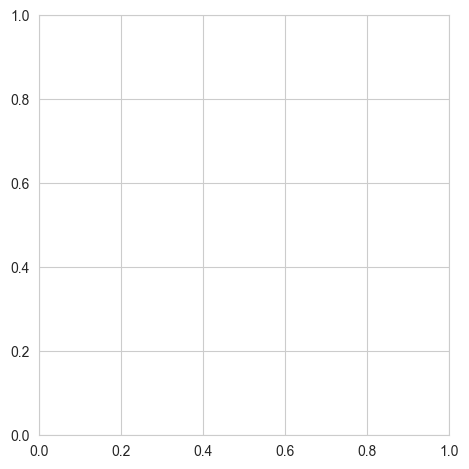

In [34]:
# Plotting the results
plt.figure(figsize=(18, 12))

# Plot for TOTAL_GALLONS
# plt.subplot(2, 3, 1)
# plt.scatter(y_test_gallons, y_pred_gallons, alpha=0.3)
# plt.plot([y_test_gallons.min(), y_test_gallons.max()], [y_test_gallons.min(), y_test_gallons.max()], 'r--')
# plt.xlabel('Actual TOTA_GALLONS')
# plt.ylabel('Predicted TOTAL_GALLONS')
# plt.title('Actual vs Predicted TOTAL_GALLONS')

# Plot for TOTAL_COST
plt.subplot(2, 3, 2)
plt.scatter(y_test_cost, y_pred_cost, alpha=0.3)
plt.plot([y_test_cost.min(), y_test_cost.max()], [y_test_cost.min(), y_test_cost.max()], 'r--')
plt.xlabel('Actual TOTAL_COST')
plt.ylabel('Predicted TOTAL_COST')
plt.title('Actual vs Predicted TOTAL_COST')

# QQ plot for TOTAL_GALLONS
# plt.subplot(2, 3, 3)
# stats.probplot(y_test_gallons - y_pred_gallons, dist="norm", plot=plt)
# plt.title('QQ Plot for TOTAL_GALLONS Residuals')

# QQ plot for TOTAL_COST
plt.subplot(2, 3, 4)
stats.probplot(y_test_cost - y_pred_cost, dist="norm", plot=plt)
plt.title('QQ Plot for TOTAL_COST Residuals')

# Error distribution for TOTAL_GALLONS
# plt.subplot(2, 3, 5)
# sns.histplot(y_test_gallons - y_pred_gallons, kde=True)
# plt.xlabel('Residuals')
# plt.title('Error Distribution for TOTAL_GALLONS')

# Error distribution for TOTAL_COST
plt.subplot(2, 3, 6)
sns.histplot(y_test_cost - y_pred_cost, kde=True)
plt.xlabel('Residuals')
plt.title('Error Distribution for TOTAL_COST')

plt.tight_layout()
plt.show()